# Оценка качества метода обучения на основе скользящего контроля

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets
import sklearn.model_selection as crossval
import sklearn.linear_model as linear_model
import sklearn.metrics as metrics


In [2]:
def plot_crossval_scores(cv_scores, test_size=None, color="Gray"):
    n_cv = len(cv_scores)
    cv_scores_mean = np.mean(cv_scores)
    cv_scores_std = np.std(cv_scores)
    if test_size is None:
        plt.title(f"Cross-validation scores: {n_cv} splits")
    else:
        plt.title(f"Cross-validation scores: {n_cv} splits; test size: {test_size}")
    plt.plot(sorted(cv_scores), marker='o')
    plt.hlines(cv_scores_mean, 0, n_cv-1, colors="k", linestyles="dashed", 
               label=f"cross-val mean: {cv_scores_mean:.2f}")
    plt.fill_between(np.arange(n_cv), 
                     np.full(n_cv, cv_scores_mean-cv_scores_std),
                     np.full(n_cv, cv_scores_mean+cv_scores_std),
                     color=color, alpha=0.25,
                     label=f"corss-val std: {cv_scores_std:.2f}")
    plt.ylim(0.5, 1.05)
    # plt.minorticks_on()
    plt.xticks(range(n_cv))
    plt.ylabel("accuracy score")
    plt.xlabel("index")
    plt.legend(loc="lower left")

In [3]:
def plot_crossval_test_sizes(C=100.0, color="k"):
    n_splits = 100
    cv_scores = []
    test_sizes = np.linspace(0.05, 0.55, 11)
    for test_size in test_sizes:
        _alg_cv = linear_model.LogisticRegression(
                    solver="liblinear", penalty="l2", max_iter=1000, C=C)
        _cv = crossval.StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, 
                                              random_state=np.random.RandomState(0))
        _score_val = crossval.cross_val_score(_alg_cv, X, Y, cv=_cv)
        cv_scores.append( _score_val )

    cv_scores = np.array(cv_scores)

    n_cv = len(cv_scores)
    plt.title(f"Cross-validation scores for different test sizes ({n_splits} splits) C: {C}")
    cv_scores_mean = np.mean(cv_scores, axis=1)
    plt.plot(test_sizes, cv_scores_mean, marker='o', color=color)
    for ts, sc in zip(test_sizes, cv_scores_mean):
        plt.text(ts, sc, f"{sc:.2f}")
    plt.fill_between(test_sizes, 
                     np.quantile(cv_scores, 0.25, axis=1),
                     np.quantile(cv_scores, 0.75, axis=1),
                     color=color, alpha=0.10)
    
    plt.ylim(0.5, 1.05)
    plt.xlabel("test_size")
    plt.ylabel("cross-validate score")
    plt.minorticks_on()
    # plt.legend(loc="lower left")


In [4]:
def plot_crossval_learning_curve(C=100.0):
    n_splits = 100
    cv_train_scores = []
    cv_test_scores = []
    test_sizes = np.linspace(0.05, 0.55, 11)
    for test_size in test_sizes:
        _alg_cv = linear_model.LogisticRegression(
                    solver="liblinear", penalty="l2", max_iter=1000, C=C)
        _cv = crossval.StratifiedShuffleSplit(n_splits=n_splits, test_size=test_size, 
                                              random_state=np.random.RandomState(0))
        _score_dict = crossval.cross_validate(_alg_cv, X, Y, cv=_cv, return_train_score=True)
        _test_score = _score_dict["test_score"]
        _train_score = _score_dict["train_score"]
        cv_train_scores.append( _train_score )
        cv_test_scores.append( _test_score )

    cv_train_scores = np.array(cv_train_scores)
    cv_test_scores = np.array(cv_test_scores)

    cv_train_scores_mean = np.mean(cv_train_scores, axis=1)
    cv_test_scores_mean = np.mean(cv_test_scores, axis=1)
    
    n_test_cv = len(cv_test_scores)
    n_train_cv = len(cv_test_scores)
    plt.title(f"Cross-validation scores for different test sizes ({n_splits} splits) C: {C}")
    plt.plot(test_sizes, cv_train_scores_mean, marker='o', label="train", color="g")
    plt.plot(test_sizes, cv_test_scores_mean, marker='o', label="test", color="b")
    for ts, sc in zip(test_sizes, cv_train_scores_mean):
        plt.text(ts, sc, f"{sc:.2f}", color='k')
    for ts, sc in zip(test_sizes, cv_test_scores_mean):
        plt.text(ts, sc, f"{sc:.2f}", color='k')
    plt.fill_between(test_sizes, 
                     np.quantile(cv_train_scores, 0.25, axis=1),
                     np.quantile(cv_train_scores, 0.75, axis=1),
                     color='g', alpha=0.25)
    plt.fill_between(test_sizes, 
                     np.quantile(cv_test_scores, 0.25, axis=1),
                     np.quantile(cv_test_scores, 0.75, axis=1),
                     color='b', alpha=0.25)
    
    plt.ylim(0.75, 1.05)
    plt.xlabel("test_size")
    plt.ylabel("cross-validate score")
    plt.minorticks_on()
    plt.legend(loc="lower left")


In [5]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
feature_names = iris.feature_names
class_names = iris.target_names
print("Instances:", len(X))
print("Class names:", class_names)
print("Feature names", feature_names)

Instances: 150
Class names: ['setosa' 'versicolor' 'virginica']
Feature names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


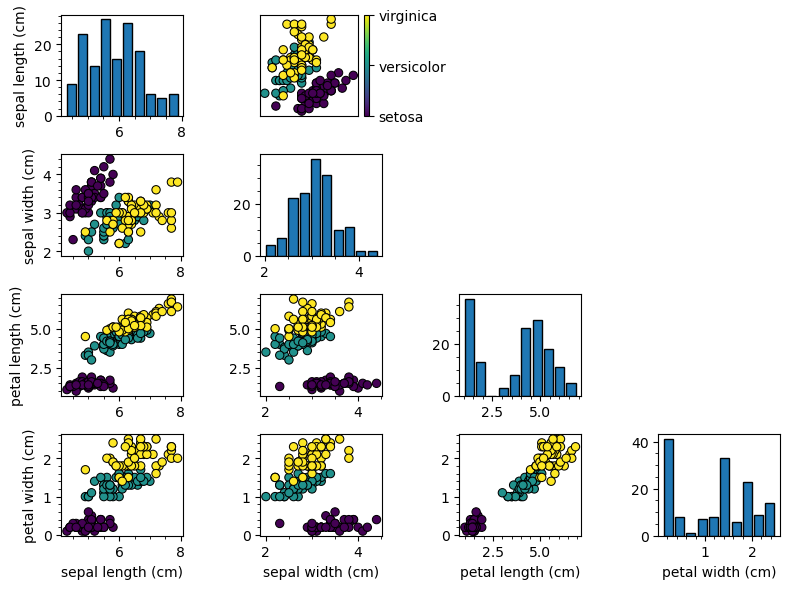

In [6]:
plt.figure(figsize=(8,6))
for i in range(4):
    for j in range(4):
        if i == 1 and j == 0:
            plt.subplot(4, 4, 4*j+i+1)
            cs = plt.scatter(X[:,i], X[:,j], c=Y, edgecolors='k', s=36, linewidths=0.75)
            plt.xticks([])
            plt.yticks([])
            cb = plt.colorbar(cs, ticks=[0,1,2])
            cb.set_ticklabels(class_names)
        if i > j:
            continue
        plt.subplot(4, 4, 4*j+i+1)
        if i == 0:
            plt.ylabel(feature_names[j])
        if j == 3:
            plt.xlabel(feature_names[i])
        if i == j:
            plt.hist(X[:,i], rwidth=0.8, edgecolor='k')
        elif i < j:
            plt.scatter(X[:,i], X[:,j], c=Y, edgecolors='k', s=36, linewidths=0.75)
        plt.minorticks_on()
            
plt.tight_layout()
plt.show()

## Обучение без регуляризации

### Обучение по всему обучающему множеству

In [7]:
alg0 = linear_model.LogisticRegression(
            solver="liblinear", penalty="l2", max_iter=1000, C=100.0)
alg0.fit(X, Y)
print("Accuracy score:", metrics.accuracy_score(alg0.predict(X), Y))

Accuracy score: 0.98


### Обучение путем разбиений на обучающую и тестовую выборки

#### Метод K-Fold

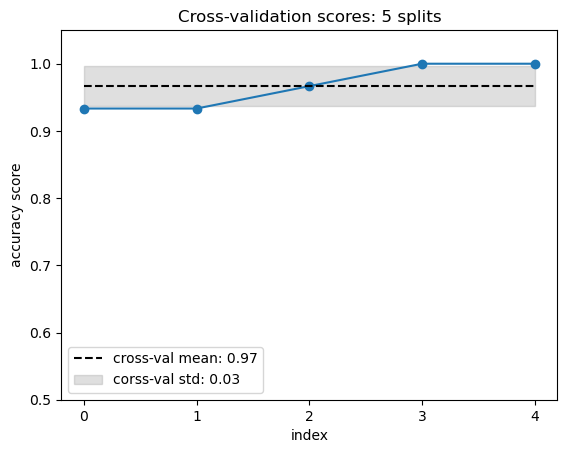

In [8]:
alg0_cv = linear_model.LogisticRegression(
                solver="liblinear", penalty="l2", max_iter=1000, C=100.0)
cv0 = crossval.StratifiedKFold(n_splits=5, shuffle=True)
cv0_scores = crossval.cross_val_score(alg0_cv, X, Y, cv=cv0)

plot_crossval_scores(cv0_scores)

#### Метод случайных разбиений

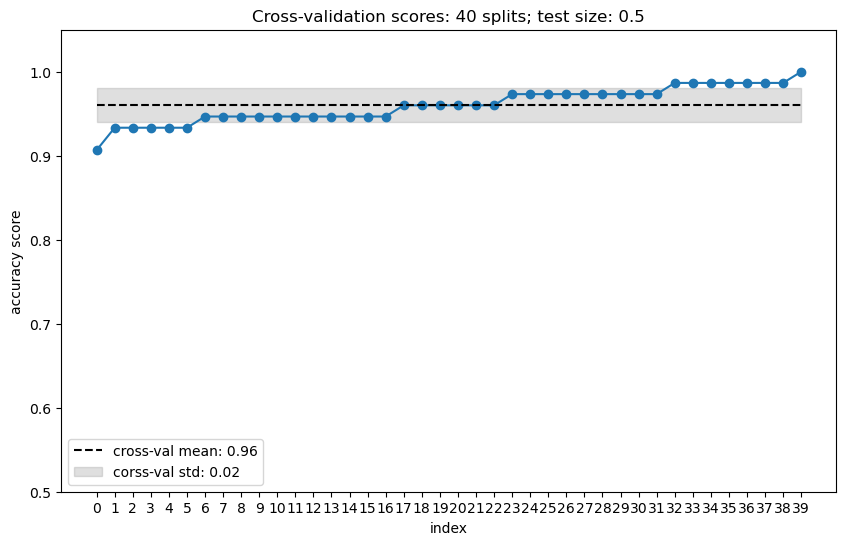

In [9]:
test_size = 0.5
alg1_cv = linear_model.LogisticRegression(
                solver="liblinear", penalty="l2", max_iter=1000, C=100.0)
cv1 = crossval.StratifiedShuffleSplit(n_splits=40, test_size=test_size, 
                                      random_state=np.random.RandomState(0))
cv1_scores = crossval.cross_val_score(alg1_cv, X, Y, cv=cv1)

plt.figure(figsize=(10,6))
plot_crossval_scores(cv1_scores, test_size=test_size)

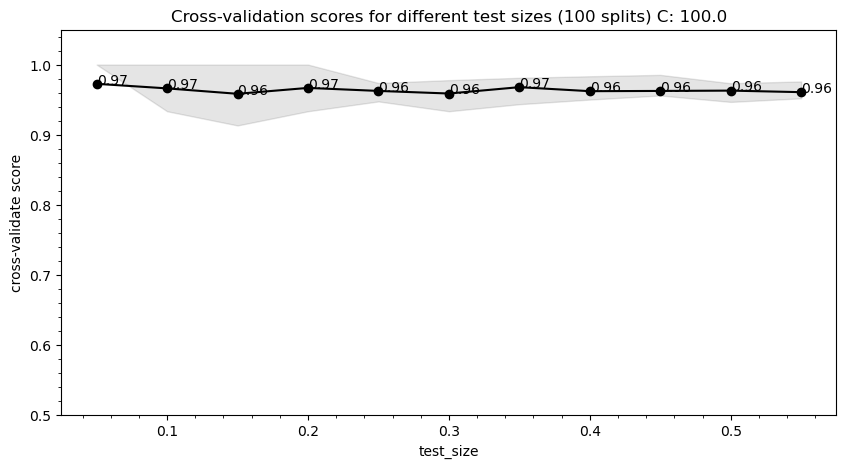

In [10]:
plt.figure(figsize=(10,5))
plot_crossval_test_sizes(color='k')

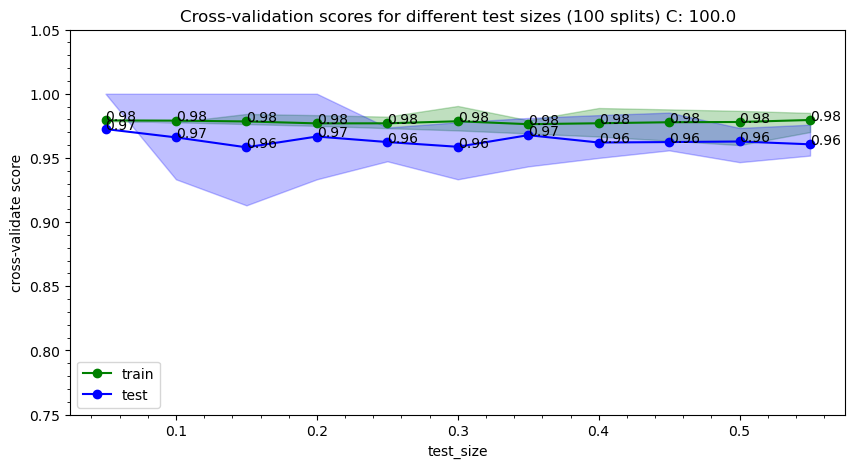

In [11]:
plt.figure(figsize=(10,5))
plot_crossval_learning_curve()

## Обучение с регуляризацией

### Обучение по всему обучающем множестве

In [12]:
alg2 = linear_model.LogisticRegression(
            solver="liblinear", penalty="l2", max_iter=1000, C=1.0)
alg2.fit(X, Y)
print("Accuracy score:", metrics.accuracy_score(alg2.predict(X), Y))

Accuracy score: 0.96


### Обучение путем разбиений на обучающую и тестовую выборки

#### Метод K-Fold

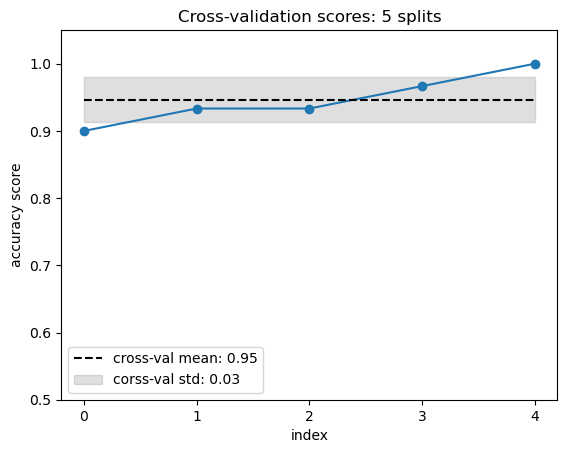

In [13]:
alg2_cv = linear_model.LogisticRegression(
                solver="liblinear", penalty="l2", max_iter=1000, C=1.0)
cv2 = crossval.StratifiedKFold(n_splits=5, shuffle=True)
cv2_scores = crossval.cross_val_score(alg2_cv, X, Y, cv=cv2)

plot_crossval_scores(cv2_scores)

#### Метод случайных разбиений

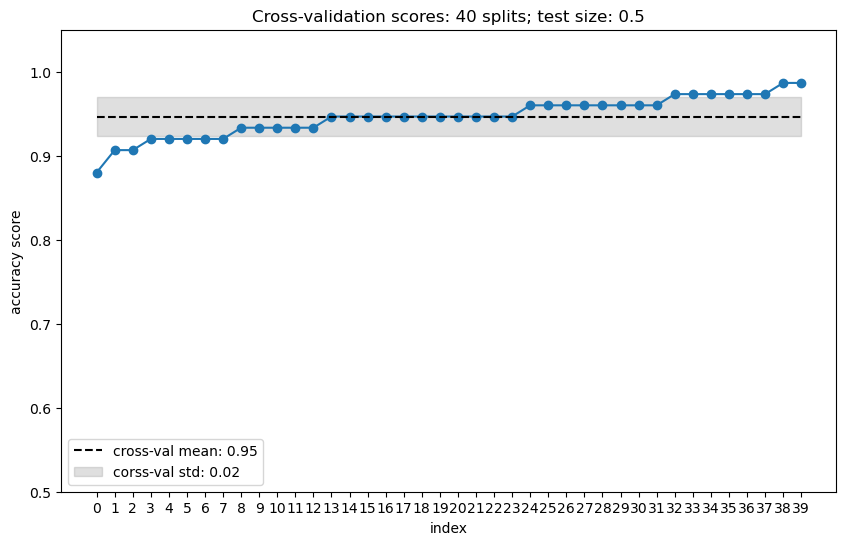

In [14]:
test_size = 0.5
alg3_cv = linear_model.LogisticRegression(
                solver="liblinear", penalty="l2", max_iter=1000, C=1.0)
cv3 = crossval.StratifiedShuffleSplit(n_splits=40, test_size=test_size, 
                                      random_state=np.random.RandomState(0))
cv3_scores = crossval.cross_val_score(alg3_cv, X, Y, cv=cv3)

plt.figure(figsize=(10,6))
plot_crossval_scores(cv3_scores, test_size=test_size)

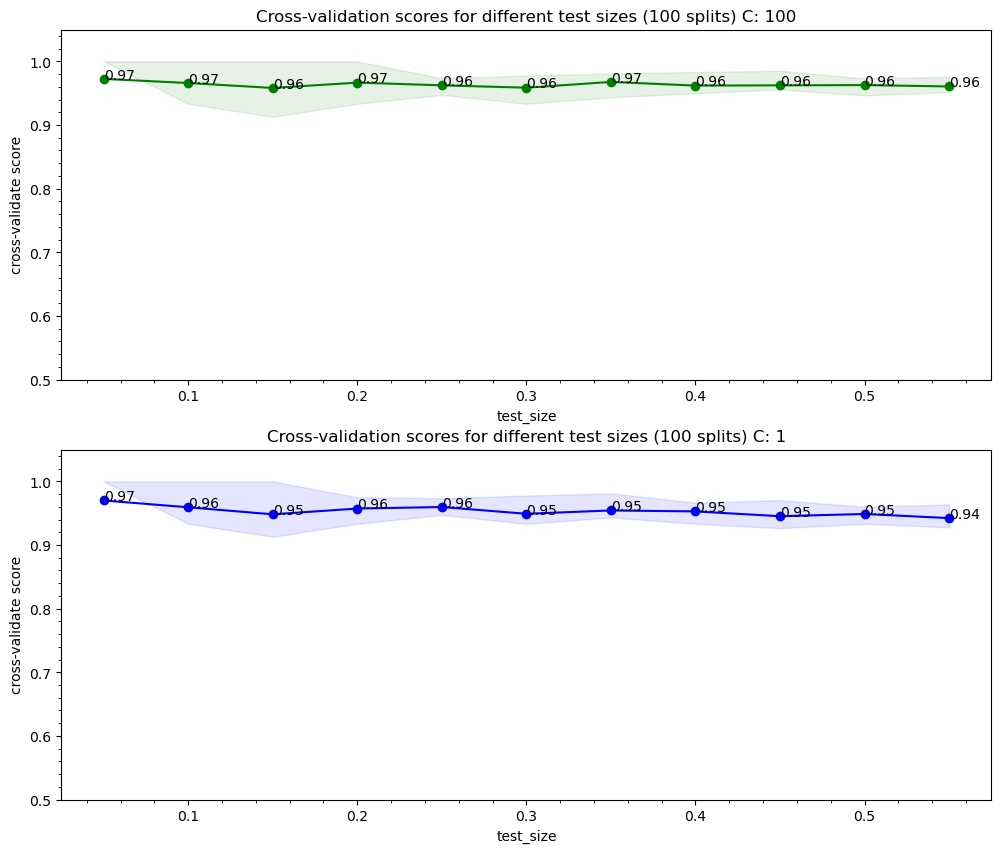

In [15]:
plt.figure(figsize=(12,10))
plt.subplot(2, 1, 1)
plot_crossval_test_sizes(C=100, color='g')
plt.subplot(2, 1, 2)
plot_crossval_test_sizes(C=1, color='b')

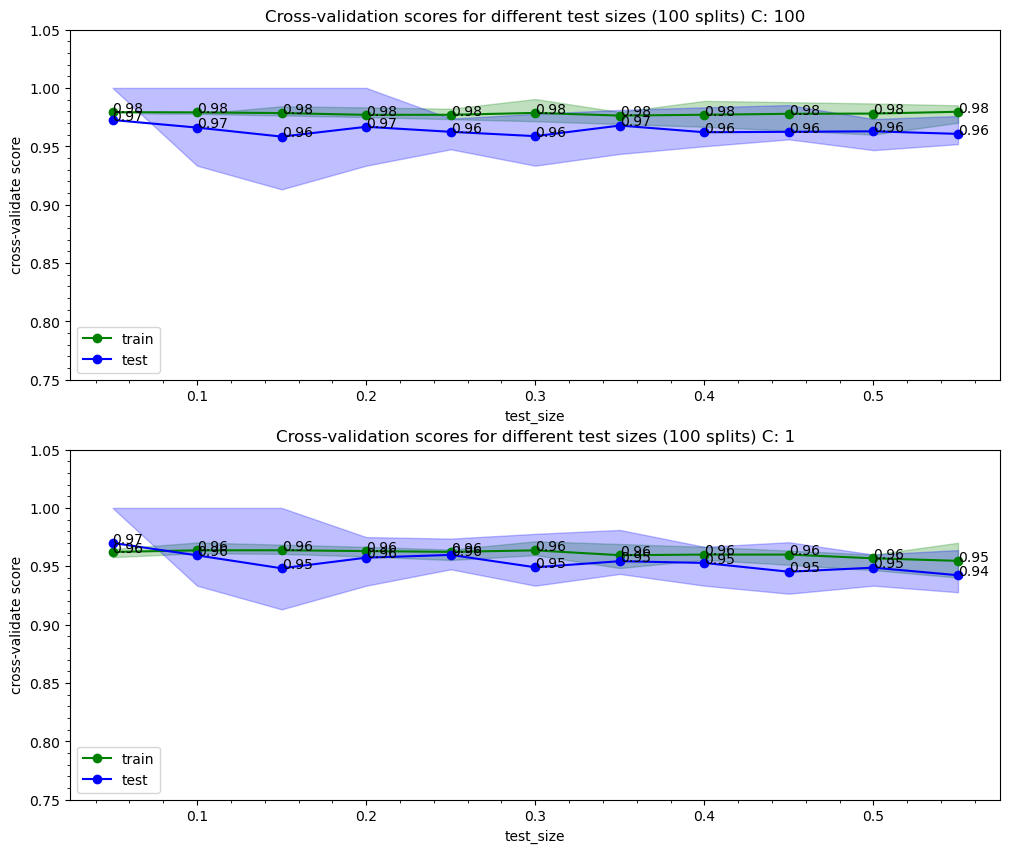

In [16]:
plt.figure(figsize=(12,10))
plt.subplot(2, 1, 1)
plot_crossval_learning_curve(C=100)
plt.subplot(2, 1, 2)
plot_crossval_learning_curve(C=1)

## Оценка параметра регуляризации

#### Метод K-Fold

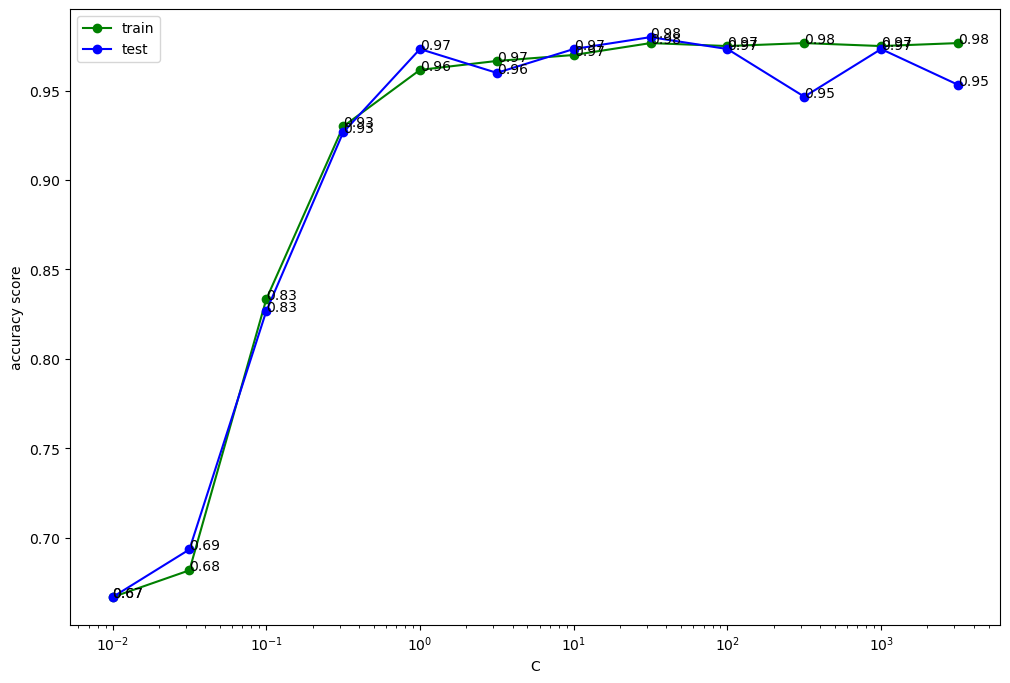

In [52]:
params = [10.0**i for i in np.arange(-2, 4, 0.5)]
param_test_scores = []
param_train_scores = []
for C in params:
    _alg_cv = linear_model.LogisticRegression(
                solver="liblinear", penalty="l2", max_iter=1000, C=C)
    _cv = crossval.StratifiedKFold(n_splits=5, shuffle=True)
    _score_dict = crossval.cross_validate(_alg_cv, X, Y, cv=_cv, return_train_score=True)
    param_train_scores.append(_score_dict["train_score"].mean())
    param_test_scores.append(_score_dict["test_score"].mean())

plt.figure(figsize=(12,8))
plt.plot(params, param_train_scores, marker='o', color='g', label="train")
plt.plot(params, param_test_scores, marker='o', color='b', label="test")
for ts, sc in zip(params, param_train_scores):
    plt.text(ts, sc, f"{sc:.2f}")
for ts, sc in zip(params, param_test_scores):
    plt.text(ts, sc, f"{sc:.2f}")

plt.gca().set_xscale('log')
plt.xlabel("C")
plt.ylabel("accuracy score")
plt.legend()
plt.show()